# Unsupervised Learning | Dimensionality Reduction (PCA)


### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## PCA | Full Case-study (Wine)


In [2]:
dataset = pd.read_csv('data/wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
X = dataset.iloc[:, :-1].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
y = dataset.iloc[:, -1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

### Extracting Features


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Feature Scaling


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
X_train.shape

(142, 13)

In [15]:
X_test.shape

(36, 13)

### Reducing Dimesions (PCA)


In [16]:
from sklearn.decomposition import PCA 

In [17]:
pca = PCA(n_components=2)

In [18]:
X_train = pca.fit_transform(X_train)

In [19]:
X_test = pca.fit_transform(X_test)


In [20]:
X_train.shape

(142, 2)

In [21]:
X_test.shape

(36, 2)

Text(0, 0.5, 'Second Principal Component')

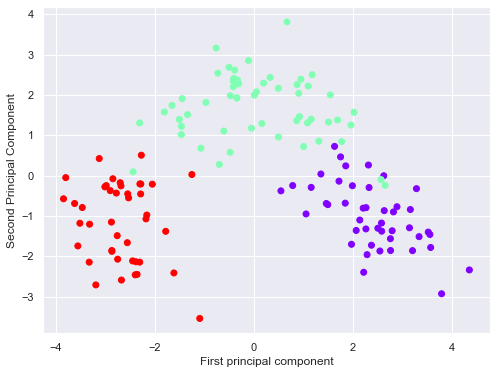

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1],c=y_train,cmap='rainbow')


plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [25]:
pca.components_

array([[-0.20494435,  0.23233042, -0.04225825,  0.21160729, -0.22675665,
        -0.40356775, -0.40135383,  0.26748469, -0.34982776, -0.02563291,
        -0.23311185, -0.36486741, -0.31627939],
       [-0.40203737, -0.20142594, -0.34638936, -0.05756773, -0.40290945,
         0.08522193,  0.10177141, -0.022158  ,  0.11253368, -0.50500374,
         0.28464013,  0.17261354, -0.33990979]])

In [26]:
pca.explained_variance_ratio_

array([0.34742496, 0.19120613])

### Training Another Model (Logistic Regression)
#### This only for demonstration


In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

### Evaluating Final Model


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
y_pred

array([3, 1, 2, 3, 2, 3, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3], dtype=int64)

In [29]:
y_pred = classifier.predict(X_test)
y_pred

array([3, 1, 2, 3, 2, 3, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3], dtype=int64)

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  1 13]
 [ 2 13  1]
 [ 6  0  0]]


In [31]:
accuracy_score(y_test, y_pred)

0.3611111111111111